In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#Data importeren
start_df = pd.read_csv('i4talent_2.csv', sep=',')
start_df.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


In [2]:
#Er missen leeftijden, dus via geboortedatum leeftijden berekend
def fill_age(row):
    if pd.isnull(row['leeftijd']):
        birth_year = pd.to_datetime(row['geboortedatum']).year
        return row['STATUS_JAAR'] - birth_year
    else:
        return row['leeftijd']

start_df['leeftijd'] = start_df.apply(fill_age, axis=1)

In [3]:
#column lengte dienst aanmaken
start_df['uitdiensttreding_datum'] = pd.to_datetime(start_df['uitdiensttreding_datum'])
start_df['indiensttreding_datum'] = pd.to_datetime(start_df['indiensttreding_datum'])
start_df['datum'] = pd.to_datetime(start_df['datum'])
max_udt = start_df['datum'].max()

def fill_lengte_dienst(row):
    if pd.isnull(row['lengte_dienst']):
        indiensttreding_date = row['indiensttreding_datum']
        uitdiensttreding_date = row['uitdiensttreding_datum']
        
        if uitdiensttreding_date.year < 1999:
            lengte_dienst = (max_udt - indiensttreding_date).days / 365.25
        else:
            lengte_dienst = (uitdiensttreding_date - indiensttreding_date).days / 365.25
        
        return int(math.ceil(lengte_dienst))
    else:
        return int(row['lengte_dienst'])

start_df['lengte_dienst'] = start_df.apply(fill_lengte_dienst, axis=1)


In [4]:
#Zorgt ervoor dat column status overeenkomt met uitdiensttrending datum
start_df['uitdiensttreding_datum'] = pd.to_datetime(start_df['uitdiensttreding_datum'])

start_df['STATUS_Actief'] = start_df.apply(lambda row: 1 if row['uitdiensttreding_datum'].year < 1999 else 0, axis=1)

start_df['STATUS_BeÌÇindigd'] = start_df.apply(lambda row: 0 if row['uitdiensttreding_datum'].year < 1999 else 1, axis=1)


In [5]:
#value van beeindigd hernoemd
start_df['STATUS'] = start_df['STATUS'].replace({'BeÌÇindigd': 'Beeindigd'})
start_df

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT,STATUS_Actief,STATUS_BeÌÇindigd
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,1,0
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering,1,0
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,1,0
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,3,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,1,0
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49748,6305,2018-12-31 05:06:00,1984-04-20 05:06:00,2010-08-28 05:06:00,1905-01-01 05:06:00,34.0,11,Rotterdam,Business analist,46,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,1,0
49749,8025,2017-12-31 05:06:00,1997-06-25 05:06:00,2017-08-12 05:06:00,2019-02-12 05:06:00,20.0,0,Amsterdam,NaN,44,M,Man,Niet van toepassing,Niet van toepassing,2017,Actief,Detachering,0,1
49750,2632,2014-12-31 05:06:00,1961-04-27 05:06:00,1998-07-09 05:06:00,1905-01-01 05:06:00,53.0,16,Haarlem,Business analist,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2014,Actief,Detachering,1,0
49751,7122,2014-12-31 05:06:00,1990-09-08 05:06:00,2014-01-10 05:06:00,2019-12-30 05:06:00,24.0,0,Barendrecht,Credit controller,13,M,Man,Niet van toepassing,Niet van toepassing,2014,Actief,Detachering,0,1


array([[<Axes: title={'center': 'WerknemerID'}>,
        <Axes: title={'center': 'datum'}>,
        <Axes: title={'center': 'indiensttreding_datum'}>],
       [<Axes: title={'center': 'uitdiensttreding_datum'}>,
        <Axes: title={'center': 'leeftijd'}>,
        <Axes: title={'center': 'lengte_dienst'}>],
       [<Axes: title={'center': 'klant_id'}>,
        <Axes: title={'center': 'STATUS_JAAR'}>,
        <Axes: title={'center': 'STATUS_Actief'}>],
       [<Axes: title={'center': 'STATUS_BeÌÇindigd'}>, <Axes: >,
        <Axes: >]], dtype=object)

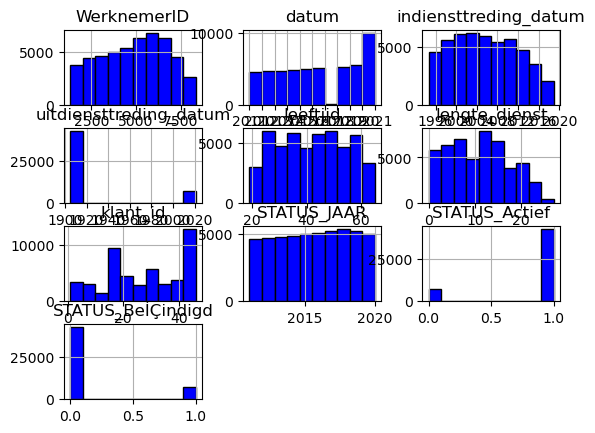

In [6]:
#Kijken voor outliers
start_df.hist(color='blue', edgecolor='black')

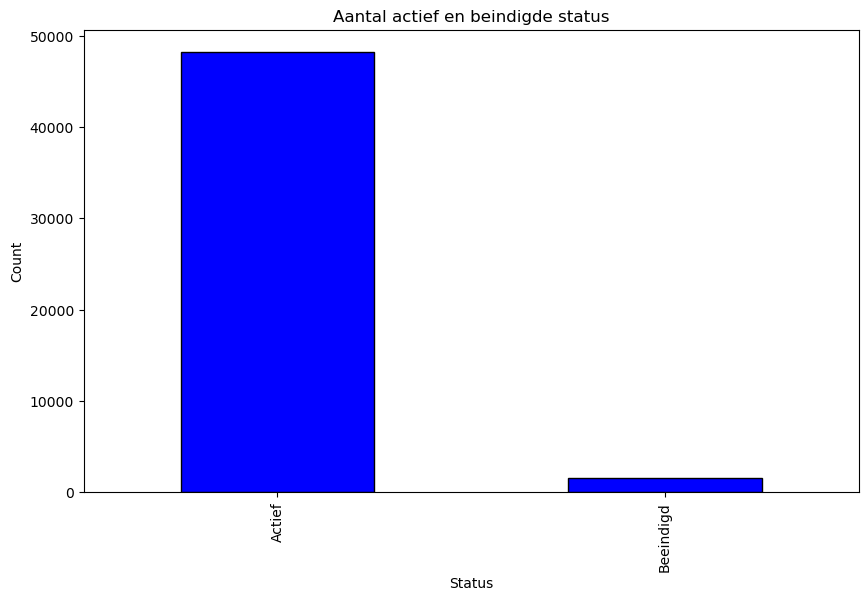

In [7]:
#Visualizaties
#Aantal actief en aantal beindigde status
start_stad_counts = start_df['STATUS'].value_counts()
plt.figure(figsize=(10, 6))
start_stad_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Aantal actief en beindigde status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

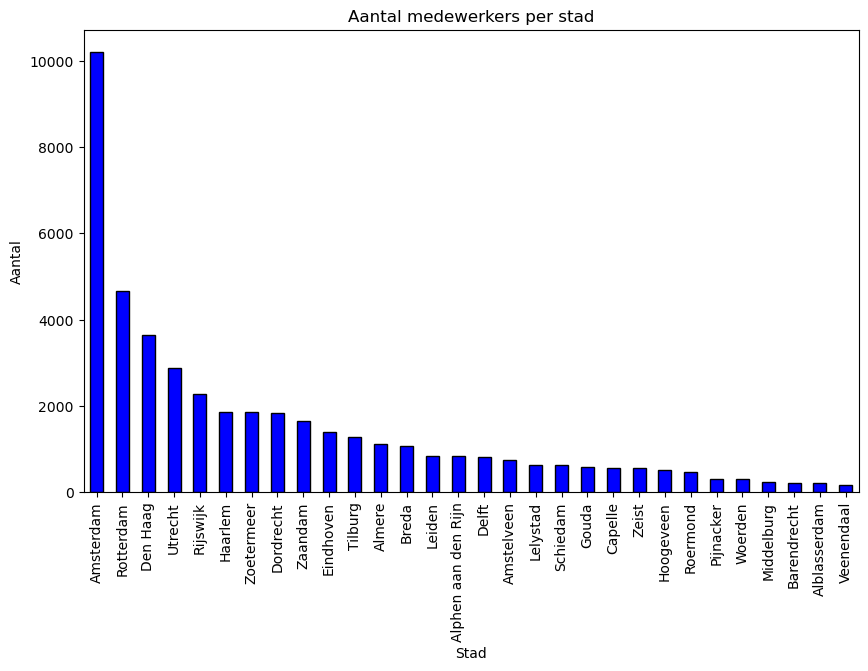

In [8]:
#Histogram aantal medewerkers per stad
start_stad_counts = start_df['stad'].value_counts()
plt.figure(figsize=(10, 6))
start_stad_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Aantal medewerkers per stad')
plt.xlabel('Stad')
plt.ylabel('Aantal')
plt.show()

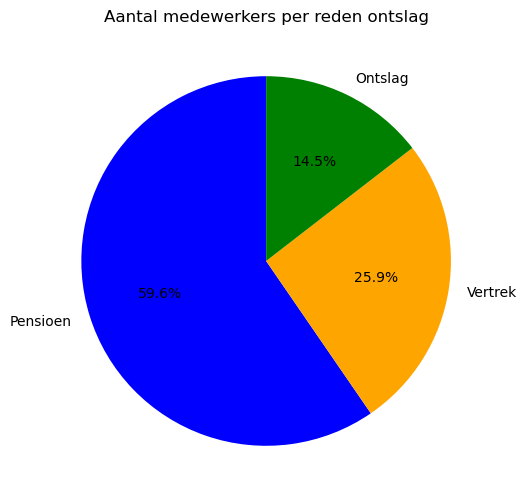

In [9]:
#Pie-chart aantal medewerkers per reden ontslag
pie_start_df = start_df[start_df['uitdiensttreding_reden'] != 'Niet van toepassing']
start_stad_counts = pie_start_df['uitdiensttreding_reden'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(start_stad_counts, labels=start_stad_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red'])
plt.title('Aantal medewerkers per reden ontslag')
plt.show()

In [10]:

df = start_df[start_df['uitdiensttreding_reden'] != 'Pensioen']
print(df.head)

<bound method NDFrame.head of        WerknemerID               datum        geboortedatum  \
0             6962 2018-12-31 05:06:00  1989-06-26 05:06:00   
1             6212 2016-12-30 05:06:00  1983-08-25 05:06:00   
2             5325 2018-12-31 05:06:00  1976-04-24 05:06:00   
3             8193 2018-12-31 05:06:00  1998-10-26 05:06:00   
4             5926 2013-12-31 05:06:00  1981-03-19 05:06:00   
...            ...                 ...                  ...   
49748         6305 2018-12-31 05:06:00  1984-04-20 05:06:00   
49749         8025 2017-12-31 05:06:00  1997-06-25 05:06:00   
49750         2632 2014-12-31 05:06:00  1961-04-27 05:06:00   
49751         7122 2014-12-31 05:06:00  1990-09-08 05:06:00   
49752         7353 2018-12-31 05:06:00  1992-05-28 05:06:00   

      indiensttreding_datum uitdiensttreding_datum  leeftijd  lengte_dienst  \
0       2013-05-23 05:06:00    1905-01-01 05:06:00      29.0              5   
1       2010-04-24 05:06:00    1905-01-01 05:06:00     

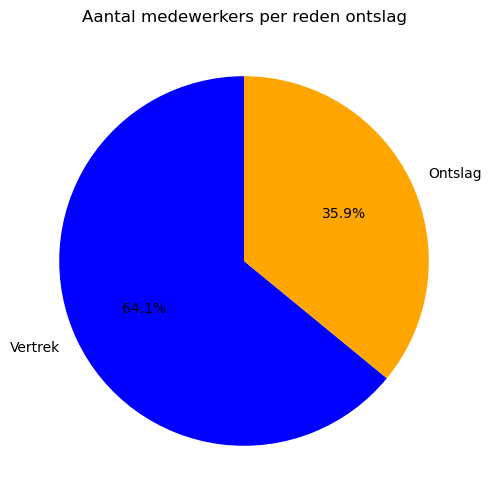

In [11]:
pie_df = df[df['uitdiensttreding_reden'] != 'Niet van toepassing']
stad_counts = pie_df['uitdiensttreding_reden'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(stad_counts, labels=stad_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red'])
plt.title('Aantal medewerkers per reden ontslag')
plt.show()

STATUS                     Actief  Beeindigd  Totaal  Percentage Beeindigd
afdeling                                                                  
Accountant                   7596        106    7702              1.376266
Administratief medewerker      51          1      52              1.923077
BI                           6201        223    6424              3.471357
Boekhouder                   7390         36    7426              0.484783
Business analist             7451         48    7499              0.640085
Business controller            88          0      88              0.000000
Business development           30          0      30              0.000000
Credit controller            5257         63    5320              1.184211
Financial controller         8959         52    9011              0.577072
HR                             45          0      45              0.000000
IT                             14          0      14              0.000000
Legal                    

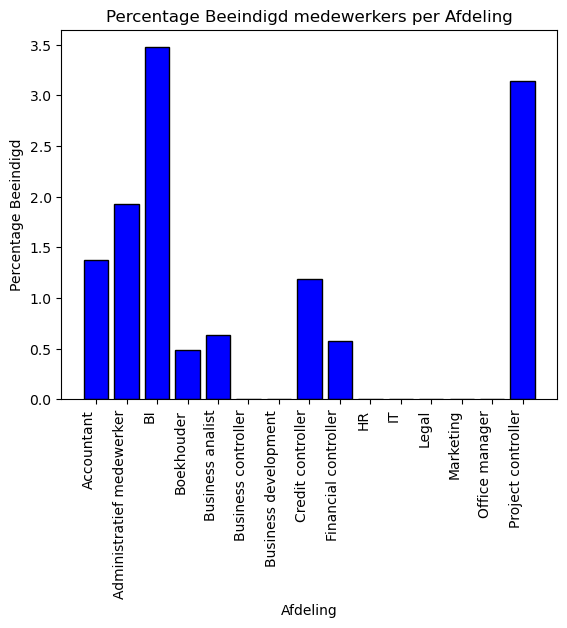

In [12]:
#histogram percentage beeindigde medewerkers per afdeling
aantal_mensen_per_afdeling_status = df.groupby(['afdeling', 'STATUS']).size().unstack(fill_value=0)
aantal_mensen_per_afdeling_status['Totaal'] = aantal_mensen_per_afdeling_status.sum(axis=1)

aantal_mensen_per_afdeling_status['Percentage Beeindigd'] = (
    aantal_mensen_per_afdeling_status['Beeindigd'] / aantal_mensen_per_afdeling_status['Totaal'] * 100
)

print(aantal_mensen_per_afdeling_status)
plt.bar(aantal_mensen_per_afdeling_status.index, aantal_mensen_per_afdeling_status['Percentage Beeindigd'], color='blue', edgecolor='black')
plt.xlabel('Afdeling')
plt.ylabel('Percentage Beeindigd')
plt.title('Percentage Beeindigd medewerkers per Afdeling')
plt.xticks(rotation=90, ha='right')
plt.show()


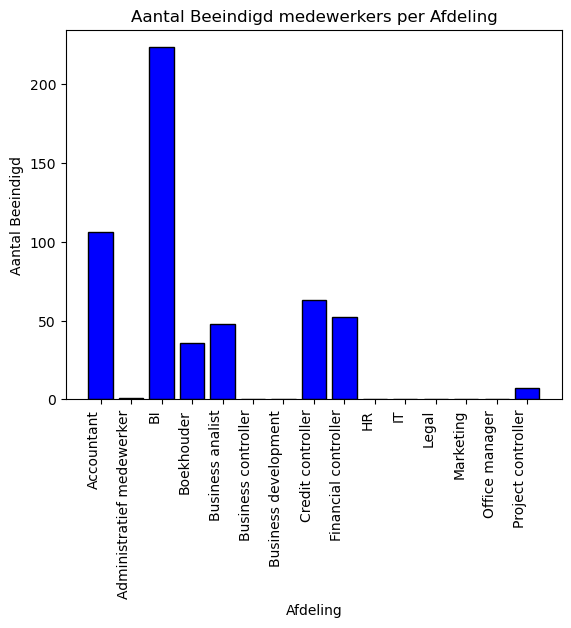

In [13]:
#histogram beeindigde medewerkers per afdeling
plt.bar(aantal_mensen_per_afdeling_status.index, aantal_mensen_per_afdeling_status['Beeindigd'], color='blue', edgecolor='black')
plt.xlabel('Afdeling')
plt.ylabel('Aantal Beeindigd')
plt.title('Aantal Beeindigd medewerkers per Afdeling')
plt.xticks(rotation=90, ha='right')
plt.show()


C:\Users\vivia\AppData\Local\Temp\ipykernel_19872\3661893962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lengte_dienst'] = pd.to_numeric(df['lengte_dienst'], errors='coerce')


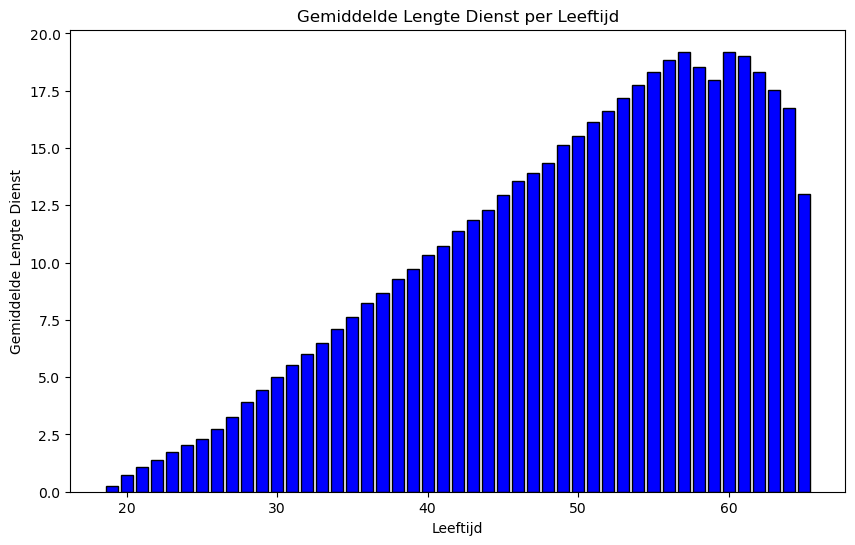

In [14]:
#gemiddelde lengte dienst per leeftijd
df['lengte_dienst'] = pd.to_numeric(df['lengte_dienst'], errors='coerce')

average_lengte_dienst_per_leeftijd = df.groupby('leeftijd')['lengte_dienst'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lengte_dienst_per_leeftijd.index, average_lengte_dienst_per_leeftijd, color='blue', edgecolor='black')

plt.title('Gemiddelde Lengte Dienst per Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Gemiddelde Lengte Dienst')
plt.show()

C:\Users\vivia\AppData\Local\Temp\ipykernel_19872\2897884313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lengte_dienst'] = pd.to_numeric(df['lengte_dienst'], errors='coerce')


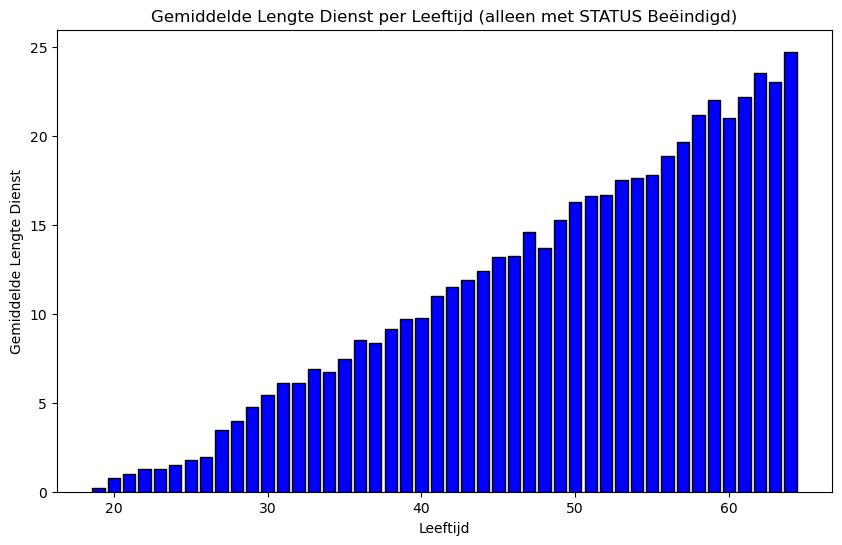

In [15]:
#Gemiddelde Lengte Dienst per Leeftijd (alleen met STATUS Beëindigd)
df['lengte_dienst'] = pd.to_numeric(df['lengte_dienst'], errors='coerce')
beindigd_data = df[df['STATUS'] == 'Beeindigd']
average_lengte_dienst_per_leeftijd = beindigd_data.groupby('leeftijd')['lengte_dienst'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lengte_dienst_per_leeftijd.index, average_lengte_dienst_per_leeftijd, color='blue', edgecolor='black')

plt.title('Gemiddelde Lengte Dienst per Leeftijd (alleen met STATUS Beëindigd)')
plt.xlabel('Leeftijd')
plt.ylabel('Gemiddelde Lengte Dienst')
plt.show()

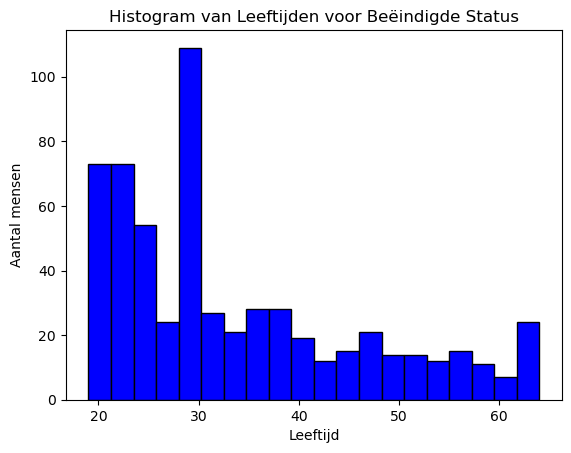

In [16]:
#histogram beeindige status per leeftijd
beeindigd_data = df[df['STATUS'] == 'Beeindigd']
plt.hist(beeindigd_data['leeftijd'], bins=20, color='blue', edgecolor='black')

plt.title('Histogram van Leeftijden voor Beëindigde Status')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal mensen')
plt.show()


C:\Users\vivia\AppData\Local\Temp\ipykernel_19872\3083089760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['leeftijd'] = pd.to_numeric(df['leeftijd'], errors='coerce')


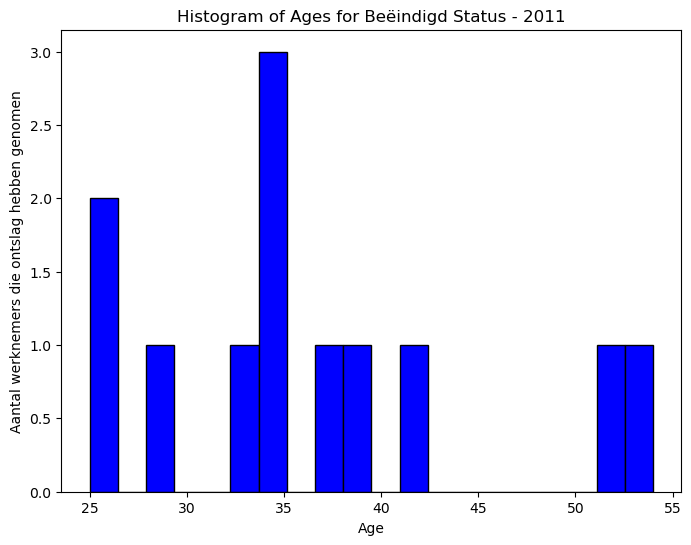

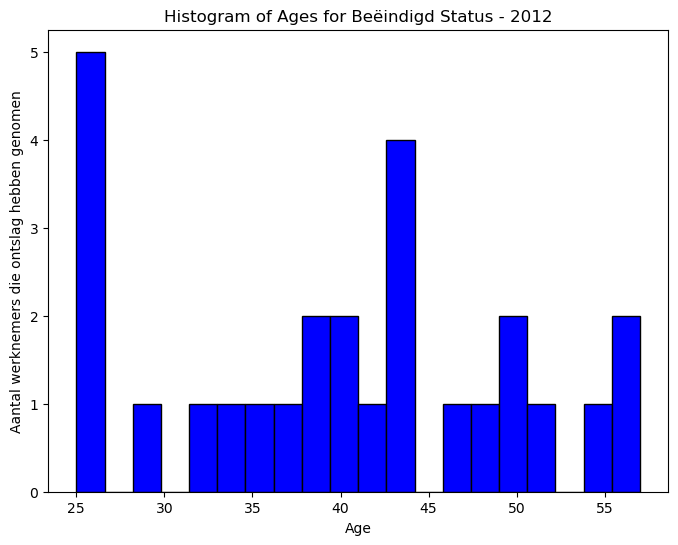

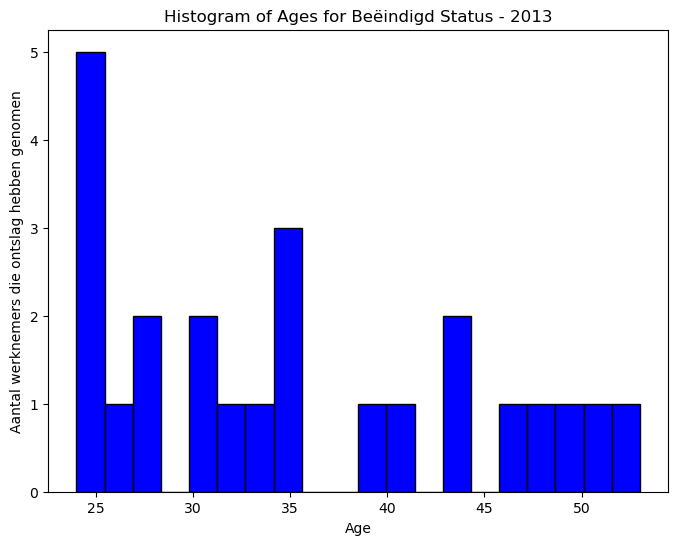

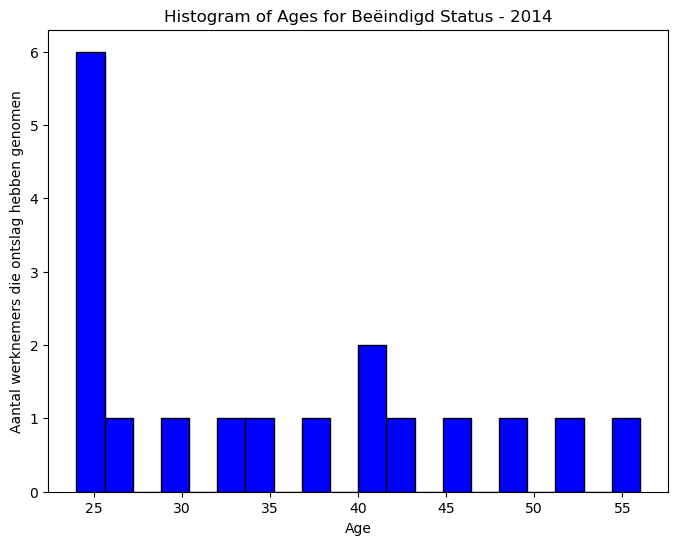

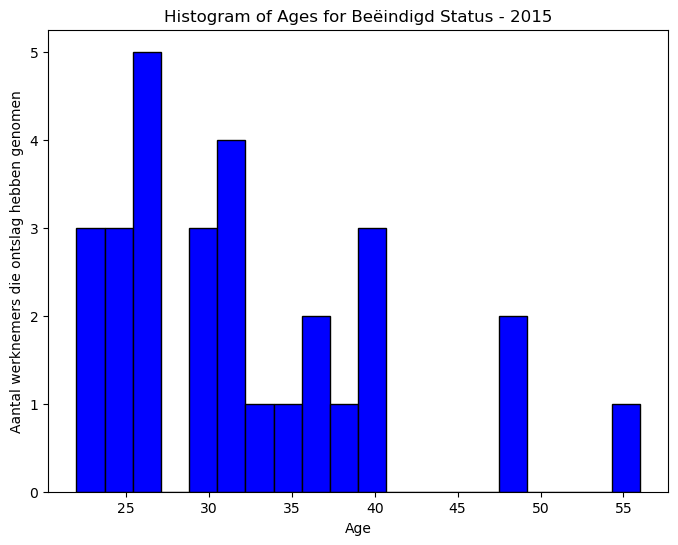

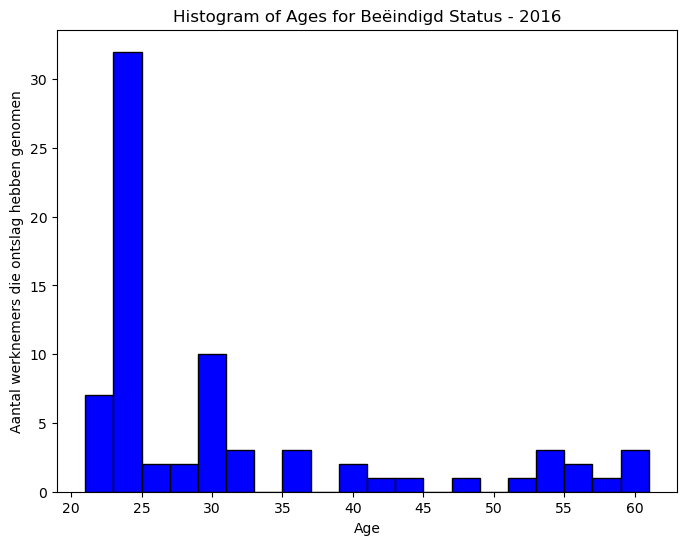

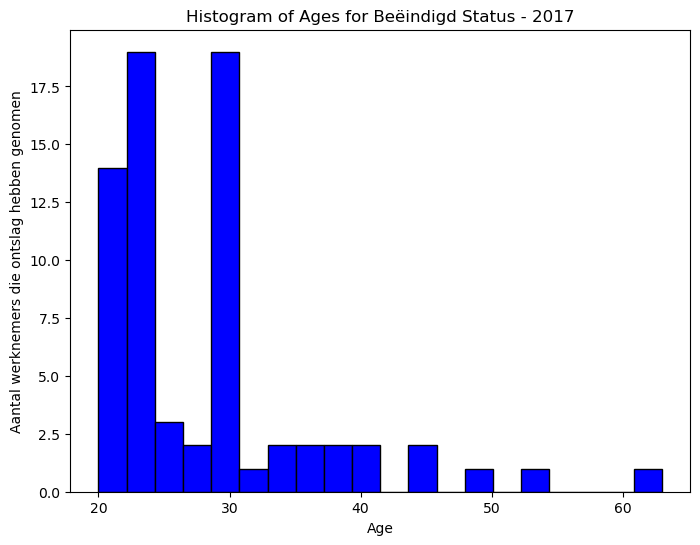

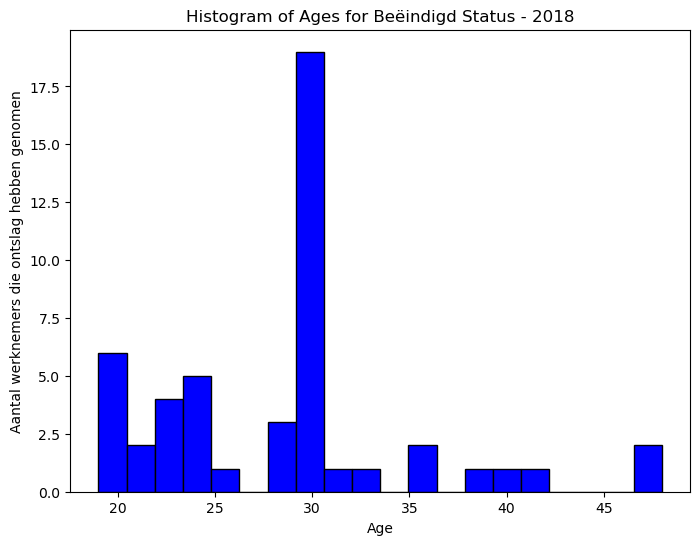

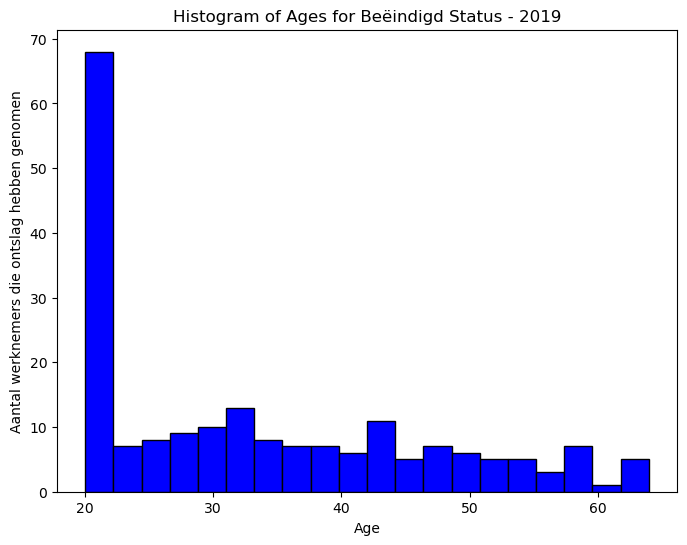

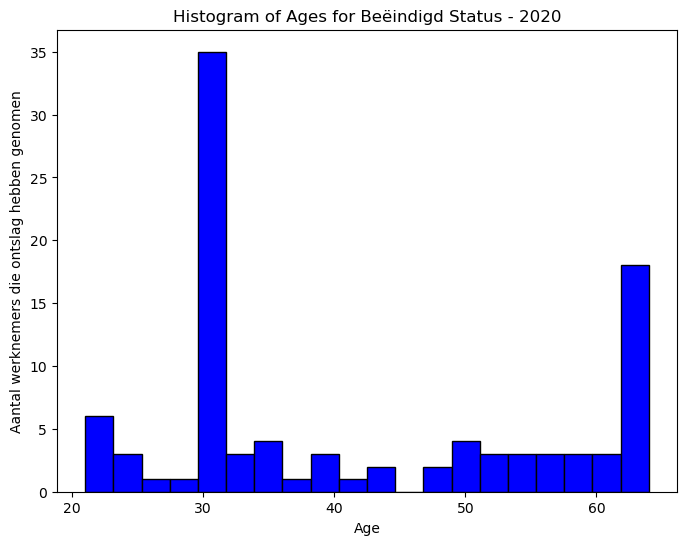

In [17]:
#histogram beeindigd medewerker per leeftijd per jaar
df['leeftijd'] = pd.to_numeric(df['leeftijd'], errors='coerce')
beindigd_data = df[df['STATUS'] == 'Beeindigd']

for year in range(2011, 2021):
    current_year_data = beindigd_data[beindigd_data['datum'].dt.year == year]

    plt.figure(figsize=(8, 6))
    plt.hist(current_year_data['leeftijd'], bins=20, color='blue', edgecolor='black')

    plt.title(f'Histogram of Ages for Beëindigd Status - {year}')
    plt.xlabel('Age')
    plt.ylabel('Aantal werknemers die ontslag hebben genomen')
    plt.show()

In [18]:
#Dummies
#Dummie uitdiensttreding reden
df = pd.get_dummies(df, columns=['uitdiensttreding_reden'])


In [19]:
#Dummie STATUS
df = pd.get_dummies(df, columns=['STATUS'])
df

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,...,uitdiensttreding_type,STATUS_JAAR,BUSINESS_UNIT,STATUS_Actief,STATUS_BeÌÇindigd,uitdiensttreding_reden_Niet van toepassing,uitdiensttreding_reden_Ontslag,uitdiensttreding_reden_Vertrek,STATUS_Actief,STATUS_Beeindigd
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5,Amstelveen,BI,30,...,Niet van toepassing,2018,Detachering,1,0,1,0,0,1,0
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6,Utrecht,Accountant,21,...,Niet van toepassing,2016,Detachering,1,0,1,0,0,1,0
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12,Amsterdam,BI,42,...,Niet van toepassing,2018,Detachering,1,0,1,0,0,1,0
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,3,Utrecht,BI,21,...,Niet van toepassing,2018,Detachering,1,0,1,0,0,1,0
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4,Den Haag,Accountant,18,...,Niet van toepassing,2013,Detachering,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49748,6305,2018-12-31 05:06:00,1984-04-20 05:06:00,2010-08-28 05:06:00,1905-01-01 05:06:00,34.0,11,Rotterdam,Business analist,46,...,Niet van toepassing,2018,Detachering,1,0,1,0,0,1,0
49749,8025,2017-12-31 05:06:00,1997-06-25 05:06:00,2017-08-12 05:06:00,2019-02-12 05:06:00,20.0,0,Amsterdam,NaN,44,...,Niet van toepassing,2017,Detachering,0,1,1,0,0,1,0
49750,2632,2014-12-31 05:06:00,1961-04-27 05:06:00,1998-07-09 05:06:00,1905-01-01 05:06:00,53.0,16,Haarlem,Business analist,5,...,Niet van toepassing,2014,Detachering,1,0,1,0,0,1,0
49751,7122,2014-12-31 05:06:00,1990-09-08 05:06:00,2014-01-10 05:06:00,2019-12-30 05:06:00,24.0,0,Barendrecht,Credit controller,13,...,Niet van toepassing,2014,Detachering,0,1,1,0,0,1,0


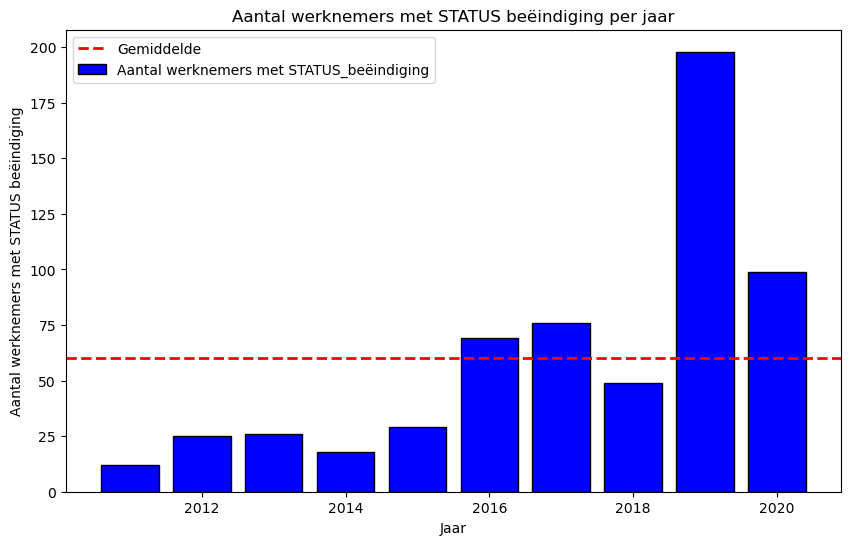

In [20]:
#Visualisaties met dummies
#Histogram van het aantal werknemers met STATUS beëindiging per jaar

df_beindigd = df[df['STATUS_Beeindigd'] == 1]

plt.figure(figsize=(10, 6))
plt.bar(df_beindigd['STATUS_JAAR'].value_counts().index, df_beindigd['STATUS_JAAR'].value_counts().values, color='blue', edgecolor='black', label='Aantal werknemers met STATUS_beëindiging')
plt.axhline(y=df_beindigd['STATUS_JAAR'].value_counts().mean(), color='red', linestyle='dashed', linewidth=2, label='Gemiddelde')

plt.xlabel('Jaar')
plt.ylabel('Aantal werknemers met STATUS beëindiging')
plt.title('Aantal werknemers met STATUS beëindiging per jaar')
plt.legend()
plt.show()

